<a href="https://colab.research.google.com/github/RodrigodeFeo/8DTS/blob/main/An%C3%A1lise_Enem_com_Amostra_10k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Carregamento dos Dados

In [ ]:
enem_sample = pd.read_excel("https://storage.googleapis.com/cloud-based-analytics_public/BI-2022/enem_sample10k.xlsx")

In [ ]:
#Prévia
enem_sample

# Questões

## Exercício 1
Qual a distribuição dos participantes por estado onde a prova foi realizada em cada ano e no total?

### Resposta total

In [ ]:
# Agrupa por UF e faz count de ID's
enem_sample_group = enem_sample.groupby(["SG_UF_PROVA"]).agg({'HASHID': 'count'}).reset_index()

# Calcula o percentual sobre o total e armazena em uma nova coluna HASHID_perc
enem_sample_group["HASHID_perc"] = enem_sample_group["HASHID"] / enem_sample_group["HASHID"].sum()

# Muda o formato da nova coluna HASHID_perc para ficar percentual
enem_sample_group["HASHID_perc"] = enem_sample_group["HASHID_perc"].map("{:.2%}".format)

#Exibe os resultados
display(enem_sample_group)

In [ ]:
px.bar(enem_sample_group.sort_values("HASHID"),
       y = "HASHID",
       x = "SG_UF_PROVA",
       hover_data=["HASHID", "HASHID_perc"]
       )

In [ ]:
px.pie(enem_sample_group,
       values="HASHID",
       names="SG_UF_PROVA")

### Resposta por ano

In [ ]:
# Agrupa por UF e ano e faz count de ID's
enem_sample_group = enem_sample.groupby(["SG_UF_PROVA", "NU_ANO"]).agg({'HASHID': 'count'}).reset_index()
display(enem_sample_group)

# Agrupamento por ano
enem_sample_group_ano = enem_sample.groupby(["NU_ANO"]).agg({'HASHID': 'count'}).reset_index()
display(enem_sample_group_ano)

In [ ]:
# JOIN / MERGE das duas tabelas, e já converte o ano para string
enem_sample_final = pd.merge(enem_sample_group, enem_sample_group_ano, on="NU_ANO", how='left', suffixes = ['', '_ano'])
enem_sample_final['NU_ANO'] = enem_sample_final['NU_ANO'].astype(str)
display(enem_sample_final)

In [ ]:
# Calcula o percentual sobre o total e armazena em uma nova coluna HASHID_perc
enem_sample_final["HASHID_perc"]     = enem_sample_final["HASHID"] / enem_sample_group["HASHID"].sum()
enem_sample_final["HASHID_perc_ano"] = enem_sample_final["HASHID"] / enem_sample_final["HASHID_ano"]

# Muda o formato da nova coluna HASHID_perc para ficar percentual
enem_sample_final["HASHID_perc_ano"] = enem_sample_final["HASHID_perc_ano"].map("{:.2%}".format)
enem_sample_final["HASHID_perc"] = enem_sample_final["HASHID_perc"].map("{:.2%}".format)

#Exibe os resultados
display(enem_sample_final)

In [ ]:
px.bar(enem_sample_final.sort_values(["NU_ANO", "HASHID"]),
       y = "HASHID",
       x = "SG_UF_PROVA",
       color="NU_ANO",
       barmode='relative',
       hover_data=["HASHID", "HASHID_perc", "HASHID_perc_ano"]
       )

In [ ]:
px.bar(enem_sample_final.sort_values(["NU_ANO", "HASHID"]),
       y = "HASHID",
       x = "SG_UF_PROVA",
       color="NU_ANO",
       barmode='group',
       hover_data=["HASHID", "HASHID_perc", "HASHID_perc_ano"]
       )

## Exercício 2
Considerando apenas 2018, quais as métricas globais de média, mediana, primeiro quartil (25%), terceiro quartil (75%) dos participantes em matemática `NU_NOTA_MT`?


In [ ]:
enem_sample_2018 = enem_sample.query("NU_ANO == 2018 and TP_PRESENCA_MT == 1")
display( enem_sample_2018 )

In [ ]:
enem_sample_2018["NU_NOTA_MT"].describe()

In [ ]:
fig = px.box(enem_sample_2018, x="NU_NOTA_MT")
fig.show()

### Adicional: Percentis (decis + quartis)

In [ ]:
enem_sample_2018["NU_NOTA_MT"].describe(percentiles = [0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9,1.0])

In [ ]:
quantiles_br = enem_sample_2018[["NU_NOTA_MT"]].quantile([0.1, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.75, 0.8, 0.9,1.0]).reset_index()
quantiles_br['index_str'] = quantiles_br['index'].astype(str)
quantiles_br

Observe que nesta amostra, nenhum aluno tirou mais do que 935.600

In [ ]:
px.bar(quantiles_br,
       y = 'NU_NOTA_MT',
       x = "index_str")

### Adicional: Histograma

Observe no histograma que apenas 1 aluno desta amostra tirou mais do que 900!

In [ ]:
meus_limites = list(range(0, 1001, 100) )
display(meus_limites)

In [ ]:
_h = np.histogram( enem_sample_2018[["NU_NOTA_MT"]].fillna(0) , bins=list(range(0, 1001, 100)))
meu_histograma = {"hist": list(_h[0]),
                  "bin_edges": list(_h[1])}
display(meu_histograma)


In [ ]:
meu_histograma_df = pd.DataFrame({"hist": meu_histograma["hist"],
                                  "bin_edges": meu_histograma["bin_edges"][:-1]})

In [ ]:
px.bar(meu_histograma_df,
       x = "bin_edges",
       y = "hist")

## Exercício 3

Faça a mesma análise, porém considerando quebras por estado (local da prova).
Indique quais estados tem métricas superiores e inferiores do que as métricas nacionais.


In [ ]:
quantiles = enem_sample_2018.groupby("SG_UF_PROVA")[["NU_NOTA_MT"]].quantile([0.0, 0.25, 0.5, 0.75, 1.0]).reset_index()
quantiles = quantiles.rename({"level_1": "quantiles"}, axis=1)
quantiles["quantiles"] = quantiles["quantiles"].map("{:.2%}".format)
quantiles

In [ ]:
fig = px.box(enem_sample_2018,
             y="NU_NOTA_MT",
             color="SG_UF_PROVA", hover_data=["SG_UF_PROVA"])
fig.show()

In [ ]:
fig = go.Figure()
boxplot_data = {"SG_UF_PROVA":["Brasil"],
                "q1": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.25)[0]],
                "median": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.50)[0]],
                "q3": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.75)[0]],
                "lowerfence": [enem_sample_2018[["NU_NOTA_MT"]].min()[0]],
                "upperfence": [enem_sample_2018[["NU_NOTA_MT"]].max()[0]],
                }

for estado in quantiles.query("quantiles == '50.00%'").sort_values(["NU_NOTA_MT"])["SG_UF_PROVA"]:
  mydata = enem_sample_2018.query(f"SG_UF_PROVA == '{estado}'")

  boxplot_data["SG_UF_PROVA"].append(estado)
  boxplot_data["q1"].append(mydata[["NU_NOTA_MT"]].quantile(0.25)[0])
  boxplot_data["median"].append(mydata[["NU_NOTA_MT"]].quantile(0.50)[0])
  boxplot_data["q3"].append(mydata[["NU_NOTA_MT"]].quantile(0.75)[0])
  boxplot_data["lowerfence"].append(mydata[["NU_NOTA_MT"]].min()[0])
  boxplot_data["upperfence"].append(mydata[["NU_NOTA_MT"]].max()[0])

fig.add_trace(go.Box(orientation="v"))
fig.update_traces(x=boxplot_data["SG_UF_PROVA"],
                  q1=boxplot_data["q1"],
                  median=boxplot_data["median"],
                  q3=boxplot_data["q3"],
                  lowerfence=boxplot_data["lowerfence"],
                  upperfence=boxplot_data["upperfence"] )

fig.show()

## Exercício 4
Faça a mesma análise, porém considerando escolaridade do pai. Indique quais casos possuem métricas superiores e inferiores do que as métricas nacionais.

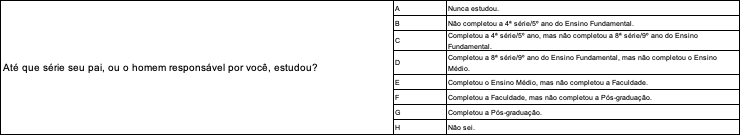

In [ ]:
quantiles = enem_sample_2018.groupby("Q001")[["NU_NOTA_MT"]].quantile([0.0, 0.25, 0.5, 0.75, 1.0]).reset_index()
quantiles = quantiles.rename({"level_1": "quantiles"}, axis=1)
quantiles["quantiles"] = quantiles["quantiles"].map("{:.2%}".format)
quantiles

In [ ]:
fig = px.box(enem_sample_2018.sort_values(["Q001"]),
             y="NU_NOTA_MT",
             color="Q001", hover_data=["Q001"])
fig.show()

In [ ]:
fig = go.Figure()
boxplot_data = {"Q001":["Brasil"],
                "q1": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.25)[0]],
                "median": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.50)[0]],
                "q3": [enem_sample_2018[["NU_NOTA_MT"]].quantile(0.75)[0]],
                "lowerfence": [enem_sample_2018[["NU_NOTA_MT"]].min()[0]],
                "upperfence": [enem_sample_2018[["NU_NOTA_MT"]].max()[0]],
                }

for estado in quantiles.query("quantiles == '50.00%'").sort_values(["NU_NOTA_MT"])["Q001"]:
  mydata = enem_sample_2018.query(f"Q001 == '{estado}'")

  boxplot_data["Q001"].append(estado)
  boxplot_data["q1"].append(mydata[["NU_NOTA_MT"]].quantile(0.25)[0])
  boxplot_data["median"].append(mydata[["NU_NOTA_MT"]].quantile(0.50)[0])
  boxplot_data["q3"].append(mydata[["NU_NOTA_MT"]].quantile(0.75)[0])
  boxplot_data["lowerfence"].append(mydata[["NU_NOTA_MT"]].min()[0])
  boxplot_data["upperfence"].append(mydata[["NU_NOTA_MT"]].max()[0])

fig.add_trace(go.Box())
fig.update_traces(x=boxplot_data["Q001"],
                  q1=boxplot_data["q1"],
                  median=boxplot_data["median"],
                  q3=boxplot_data["q3"],
                  lowerfence=boxplot_data["lowerfence"],
                  upperfence=boxplot_data["upperfence"] )

fig.show()